#Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import lightgbm as lgbm
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV

#Reading the dataset which is in the CSV format

In [3]:
diabetes_df = pd.read_csv('drive/MyDrive/diabetes1.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Exploratory Data Analysis (EDA)
what are columns available in our dataset.

In [4]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Information about the dataset

In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


To know more about the dataset

In [6]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


To know more about the dataset with transpose – here T is for the transpose

In [7]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Now let’s check that if our dataset have null values or not

In [8]:
diabetes_df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


Now let’s check the number of null values our dataset has.

In [9]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Showing the Count of NANs

In [10]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


#Data Visualization
Plotting the data distribution plots before removing null values

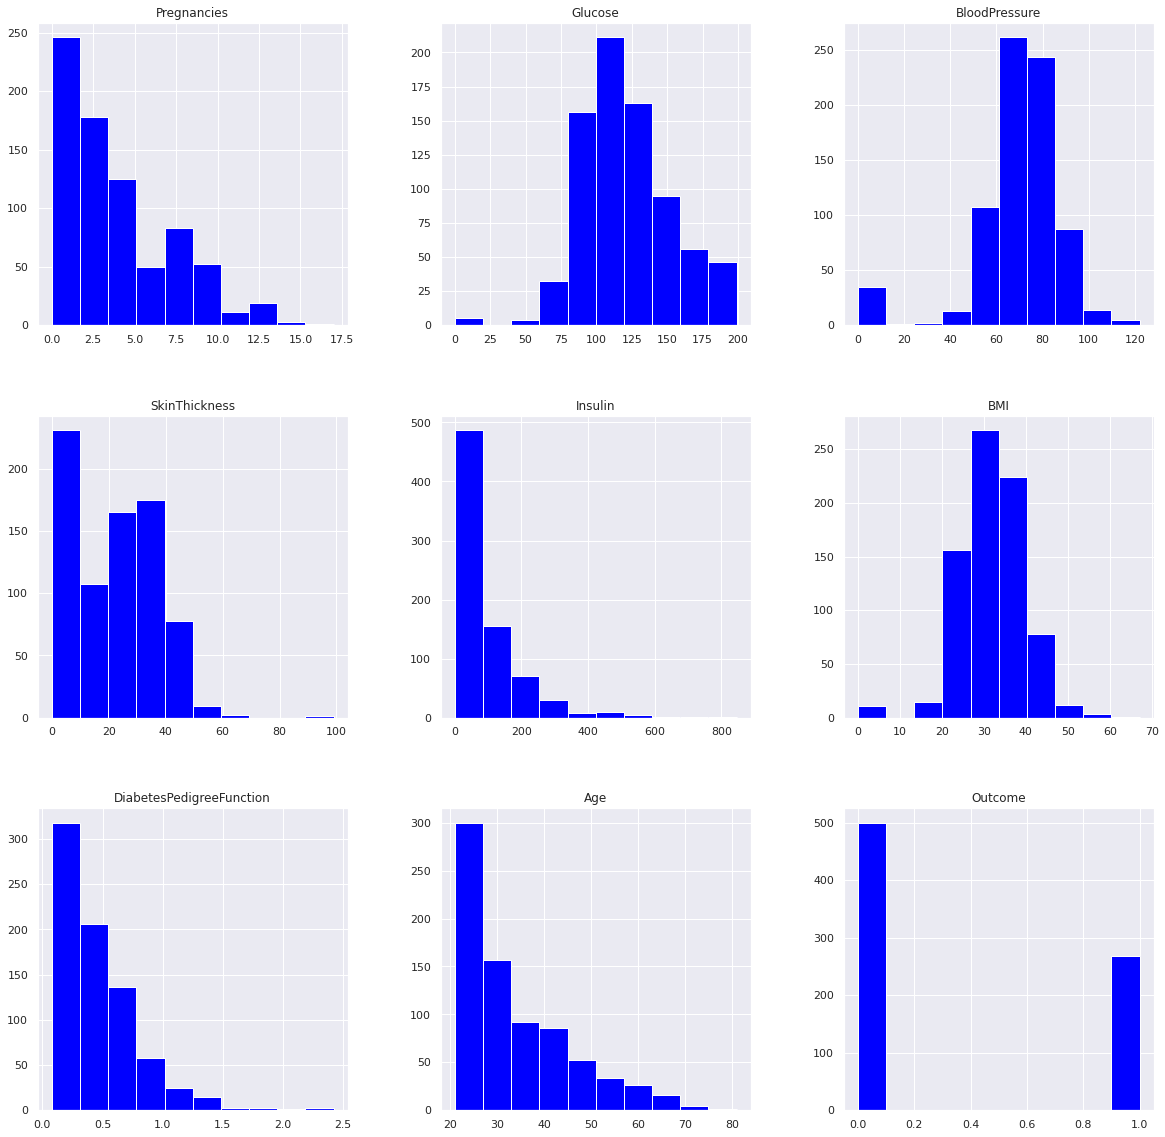

In [11]:
p = diabetes_df.hist(figsize = (20,20), color='blue')

Now we will be imputing the mean value of the column to each missing value of that particular column.

In [12]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

Plotting the distributions after removing the NAN values.

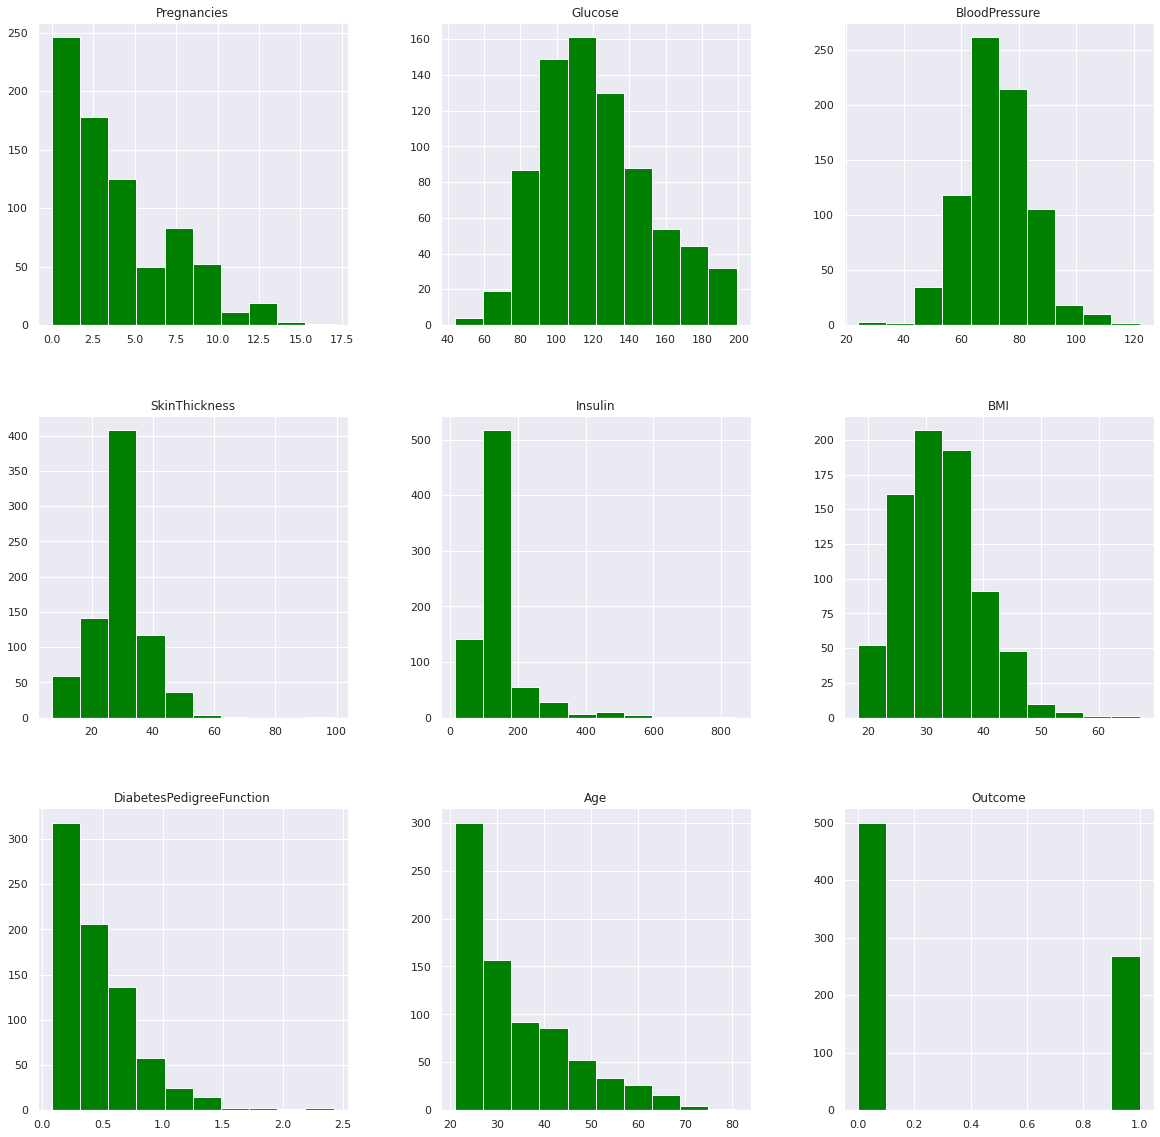

In [13]:
p = diabetes_df_copy.hist(figsize = (20,20), color='Green')

#Plotting Null Count Analysis Plot



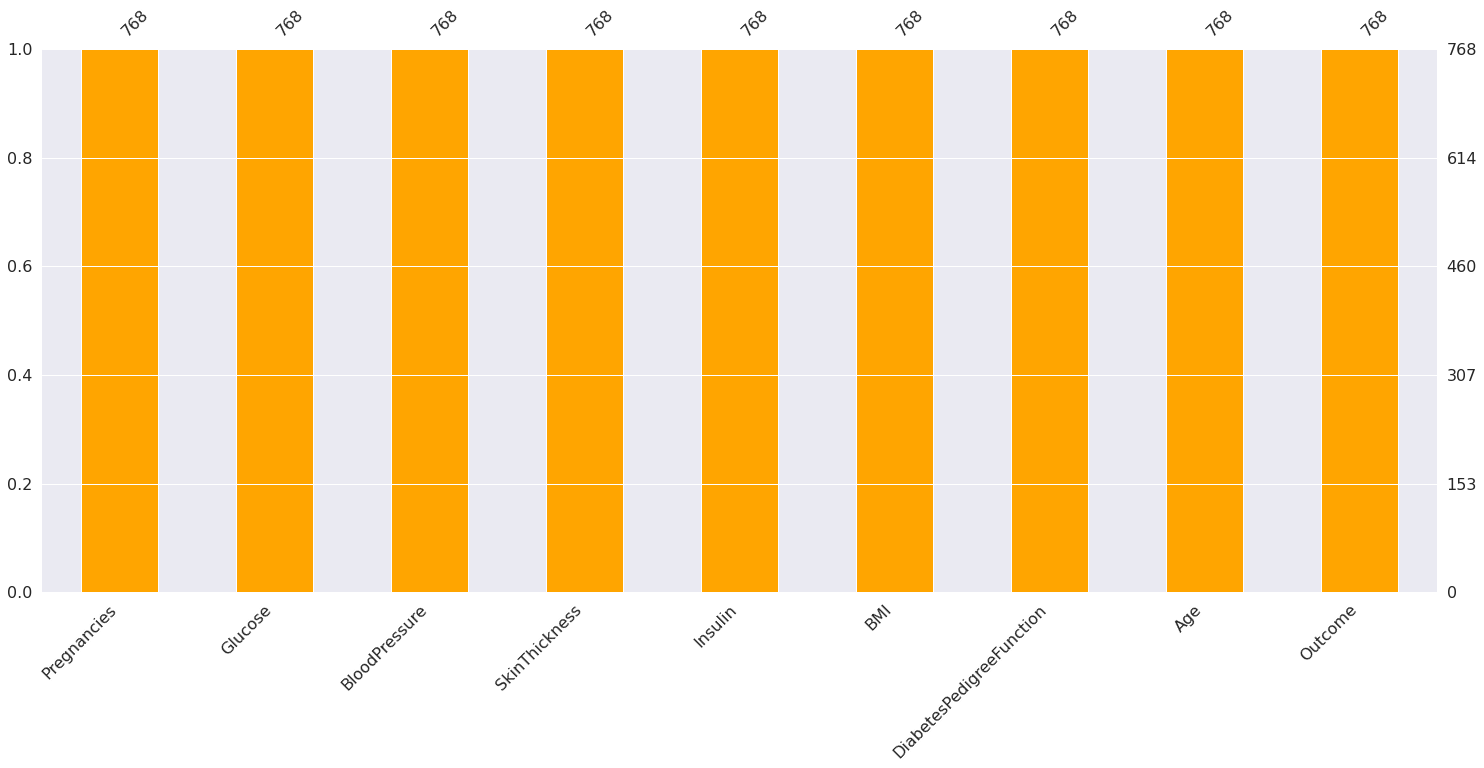

In [14]:
p = msno.bar(diabetes_df, color='orange')

Now, let’s check that how well our outcome column is balanced



0    500
1    268
Name: Outcome, dtype: int64


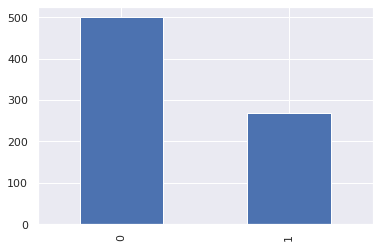

In [15]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p=diabetes_df.Outcome.value_counts().plot(kind="bar")

**Inference:** Here from the above visualization it is clearly visible that our dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.

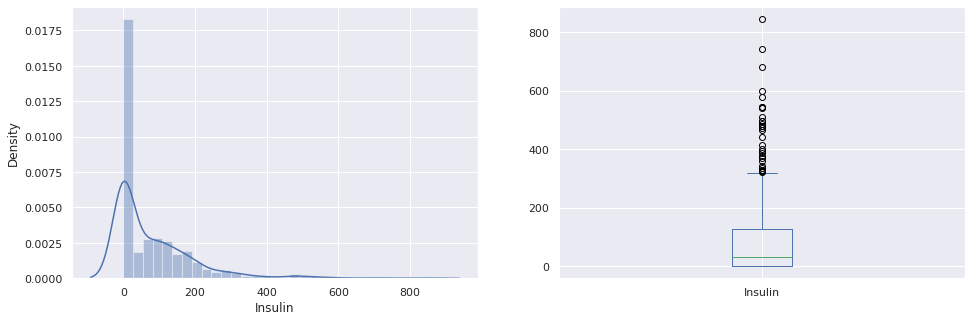

In [16]:
plt.subplot(121), sns.distplot(diabetes_df['Insulin'])
plt.subplot(122), diabetes_df['Insulin'].plot.box(figsize=(16,5))
plt.show()

**Inference:** That’s how Distplot can be helpful where one will able to see the distribution of the data as well as with the help of boxplot one can see the outliers in that column and other information too which can be derived by the box and whiskers plot.

#Correlation between all the features
Correlation between all the features before cleaning

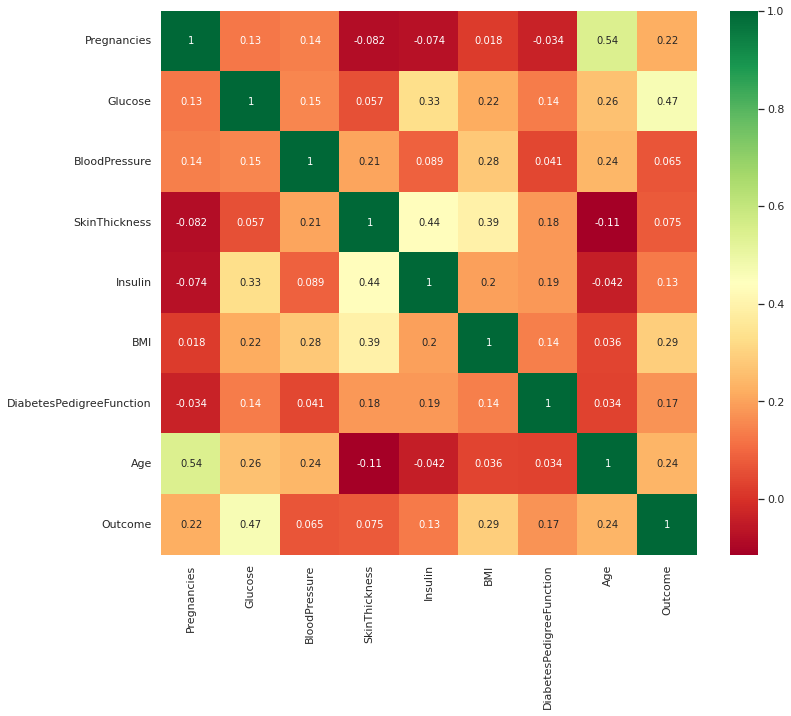

In [17]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')

#Scaling the Data
Before scaling down the data let’s have a look into it

In [18]:
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


After Standard scaling

In [19]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


Let’s explore our target column

In [20]:
y = diabetes_df_copy.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

#Model Building
Splitting the dataset

In [21]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

Now we will split the data into training and testing data using the train_test_split function

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,
                                                    random_state=7)

#Random Forest
Building the model using RandomForest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=200)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

Now after building the model let’s check the accuracy of the model on the training dataset.



In [24]:
rfc_model_train = rfc_model.predict(X_train)
from sklearn import metrics

print("Training_Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_model_train)))

Training_Accuracy_Score = 1.0


Getting the accuracy score for Random Forest



In [25]:
from sklearn import metrics

rfc_model_test = rfc_model.predict(X_test)
print("Test_Accuracy_Score =", format(metrics.accuracy_score(y_test, rfc_model_test)))

Test_Accuracy_Score = 0.8246753246753247


Classification report and confusion matrix of random forest model

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, rfc_model_test))
print(classification_report(y_test,rfc_model_test))

[[89  8]
 [19 38]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        97
           1       0.83      0.67      0.74        57

    accuracy                           0.82       154
   macro avg       0.83      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



#Decision Tree
Building the model using DecisionTree

In [27]:
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
dtree_model_train = dtree_model.predict(X_train)
from sklearn import metrics

print("Training_Accuracy_Score =", format(metrics.accuracy_score(y_train, dtree_model_train)))

Training_Accuracy_Score = 1.0


Getting the accuracy score for Decision Tree

In [29]:
from sklearn import metrics

dtree_model_test = dtree_model.predict(X_test)
print("Test_Accuracy Score =", format(metrics.accuracy_score(y_test,dtree_model_test)))

Test_Accuracy Score = 0.7597402597402597


Classification report and confusion matrix of the decision tree model

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, dtree_model_test))
print(classification_report(y_test,dtree_model_test))

[[81 16]
 [21 36]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        97
           1       0.69      0.63      0.66        57

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



#XgBoost classifier
Building model using XGBoost

In [31]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

XGBClassifier()

In [32]:
xgb_model_train = xgb_model.predict(X_train)
from sklearn import metrics

print("Training_Accuracy_Score =", format(metrics.accuracy_score(y_train, xgb_model_train)))

Training_Accuracy_Score = 0.8892508143322475


Getting the accuracy score for the XgBoost classifier

In [33]:
from sklearn import metrics

xgb_model_test = xgb_model.predict(X_test)
print("Test_Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_model_test)))

Test_Accuracy Score = 0.8116883116883117


Classification report and confusion matrix of the XgBoost classifier

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, xgb_model_test))
print(classification_report(y_test,xgb_model_test))

[[85 12]
 [17 40]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        97
           1       0.77      0.70      0.73        57

    accuracy                           0.81       154
   macro avg       0.80      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154



#Support Vector Machine (SVM)
Building the model using Support Vector Machine (SVM)

In [35]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

Prediction from support vector machine model on the testing data

In [36]:

svc_model_train = svc_model.predict(X_train)
from sklearn import metrics

print("Training_Accuracy_Score =", format(metrics.accuracy_score(y_train, svc_model_train)))

Training_Accuracy_Score = 0.7654723127035831


Accuracy score for SVM

In [37]:
from sklearn import metrics

svc_model_test = svc_model.predict(X_test)
print("Test_Accuracy Score =", format(metrics.accuracy_score(y_test, svc_model_test)))

Test_Accuracy Score = 0.7727272727272727


Classification report and confusion matrix of the SVM classifier

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_model_test))
print(classification_report(y_test,svc_model_test))

[[91  6]
 [29 28]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        97
           1       0.82      0.49      0.62        57

    accuracy                           0.77       154
   macro avg       0.79      0.71      0.73       154
weighted avg       0.78      0.77      0.76       154



#The Conclusion from Model Building
Therefore Random forest is the best model for this prediction since it has an accuracy_score of 0.82.

#Feature Importance
Knowing about the feature importance is quite necessary as it shows that how much weightage each feature provides in the model building phase.

**Getting feature importances**

In [39]:
rfc_model.feature_importances_

array([0.08228987, 0.24750903, 0.08988479, 0.07434946, 0.07133884,
       0.17600195, 0.12930119, 0.12932487])

Plotting feature importances

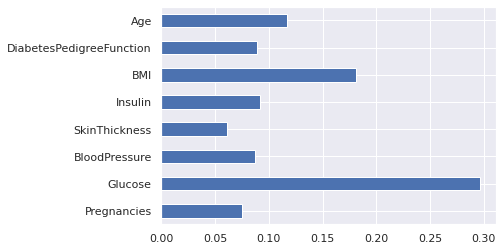

In [40]:
(pd.Series(xgb_model.feature_importances_, index=X.columns).plot(kind='barh'))

#Saving Model – Random Forest 
 



In [41]:
import pickle

# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc_model)

# Then we will be loading that saved model
rfc_model_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
rfc_model_from_pickle.predict(X_test)

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [42]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Putting data points in the model will either return 0 or 1 i.e. person suffering from diabetes or not.

In [44]:
rfc_model.predict([[0,137,40,35,168,43.1,2.228,33]]) #4th patient

array([1])

Another one



In [45]:
rfc_model.predict([[10,101,76,48,180,32.9,0.171,63]])  # 763 th patient

array([0])